## Statistical analysis of dairy sector 

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pandas.plotting import scatter_matrix
import statistics as stats1
import scipy.stats as stats
from scipy import stats
import scipy as scipy
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats import weightstats
from scipy.stats import poisson,wilcoxon
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
from sklearn.feature_selection import RFE


warnings.filterwarnings('ignore') # supress warnings

In [110]:
# import cleaned data set for EDA section.
nldf = pd.read_csv('NL_Milk_supply_and_dairy_production_Cleaned.csv')
iedf = pd.read_csv('IE_Intake of Cows Milk Cleaned.csv')
dkdf = pd.read_csv('DK_Milk_supply_Cleaned.csv')

In [86]:
iedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  130 non-null    int64  
 1   date        130 non-null    object 
 2   milk        130 non-null    float64
 3   fat         130 non-null    float64
 4   pro         130 non-null    float64
 5   year        130 non-null    int64  
 6   month       130 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 7.2+ KB


In [87]:
iedf['date'] =  pd.to_datetime(iedf['date'])

In [88]:
#iedf['months'] = iedf['date'].apply(lambda x:x.strftime('%B'))
#iedf['month'] = iedf['date'].dt.month()
#iedf['month'] = pd.DatetimeIndex(iedf['date']).month
iedf = iedf.drop(['Unnamed: 0'], axis=1)

In [89]:
iedf.head()

,date,milk,fat,pro,year,month
0,2012-01-01,133.3,3.98,3.25,2012,January
1,2012-02-01,236.6,4.06,3.24,2012,February
2,2012-03-01,473.0,3.99,3.22,2012,March
3,2012-04-01,637.3,3.81,3.32,2012,April
4,2012-05-01,735.0,3.75,3.34,2012,May


In [90]:
nldf.head()

,Unnamed: 0,date,milk,fat,pro,butter,cheese,powder tot,powder who,powder skim,con,whey,year,month
0,208,2012-01-01,1023015.0,4.48,3.57,12917.0,65821.0,18948.0,11954.0,6994.0,29767.0,.,2012,january
1,209,2012-02-01,944916.0,4.59,3.60,12386.0,61730.0,14905.0,9372.0,5533.0,30523.0,.,2012,february
2,210,2012-03-01,1037702.0,4.46,3.53,13818.0,66103.0,17169.0,11442.0,5728.0,27959.0,.,2012,march
3,211,2012-04-01,998315.0,4.43,3.52,11894.0,63307.0,16903.0,10860.0,6043.0,32211.0,.,2012,april
4,212,2012-05-01,1024366.0,4.32,3.47,14113.0,65235.0,16033.0,10082.0,5951.0,31201.0,.,2012,may


In [91]:
nldf = nldf.drop(['Unnamed: 0','butter','cheese','powder tot','powder who','powder skim','con','whey'], axis=1)

In [92]:
nldf.head()

,date,milk,fat,pro,year,month
0,2012-01-01,1023015.0,4.48,3.57,2012,january
1,2012-02-01,944916.0,4.59,3.60,2012,february
2,2012-03-01,1037702.0,4.46,3.53,2012,march
3,2012-04-01,998315.0,4.43,3.52,2012,april
4,2012-05-01,1024366.0,4.32,3.47,2012,may


In [93]:
iedf.set_index('date')
nldf.set_index('date')

,milk,fat,pro,year,month
date,,,,,
2012-01-01,1023015.0,4.48,3.57,2012,january
2012-02-01,944916.0,4.59,3.60,2012,february
2012-03-01,1037702.0,4.46,3.53,2012,march
2012-04-01,998315.0,4.43,3.52,2012,april
2012-05-01,1024366.0,4.32,3.47,2012,may
...,...,...,...,...,...
2022-06-01,1148199.0,4.25,3.48,2022,june
2022-07-01,1164104.0,4.20,3.45,2022,july
2022-08-01,1147712.0,4.21,3.46,2022,august


In [94]:
ie15to20 =  iedf[(iedf['date'] >= '2015-01-01') & (iedf['date'] <= '2020-12-31')]
nl15to20 =  nldf[(nldf['date'] >= '2015-01-01') & (nldf['date'] <= '2020-12-31')]

In [95]:
iedfm = ie15to20.groupby('month')
nldfm = nl15to20.groupby('month')
iedfm.first()
iedjan = iedfm.get_group('January')
nldjan = nldfm.get_group('january')
    #iejan.head()
    
#nldfm.get_group('April')

In [53]:
iedfm.head()

,date,milk,fat,pro,year,month
0,2012-01-01,133.3,3.98,3.25,2012,January
1,2012-02-01,236.6,4.06,3.24,2012,February
2,2012-03-01,473.0,3.99,3.22,2012,March
3,2012-04-01,637.3,3.81,3.32,2012,April
4,2012-05-01,735.0,3.75,3.34,2012,May
5,2012-06-01,684.3,3.76,3.33,2012,June
6,2012-07-01,609.8,3.85,3.25,2012,July
7,2012-08-01,546.8,3.94,3.34,2012,August
8,2012-09-01,446.6,4.13,3.53,2012,September
9,2012-10-01,364.2,4.34,3.72,2012,October


In [13]:
iedfm.describe()

milk                                                            \
          count        mean         std    min      25%     50%       75%   
month                                                                       
April      11.0  835.327273  165.265187  568.7  728.900  823.10   968.000   
August     11.0  754.373636  133.215162  546.8  651.050  786.60   855.200   
December   10.0  202.300000   49.192931  137.6  168.175  193.55   254.225   
February   11.0  281.636364   54.875172  214.0  229.750  287.10   317.650   
January    11.0  152.790909   24.444732  114.8  132.650  148.70   175.750   
July       11.0  836.263636  147.423623  609.8  728.450  853.40   964.100   
June       11.0  889.954545  142.472968  684.3  775.800  917.90  1016.000   
March      11.0  616.500000  139.169249  454.0  471.850  620.90   717.200   
May        11.0  962.054545  164.753855  733.2  830.300  993.10  1093.750   
November   10.0  360.250000   90.354084  227.6  291.575  364.35   441.875   
October    11.0  547.371818  110.820666  364.2  463.200  536.30   644.400   
September  11.0  639.792727  117.148684  446.6  551.500  654.00   723.650   

                     fat            ...    pro        year                    \
               max count      mean  ...    75%   max count    mean       std   
month                               ...                                        
April      1060.50  11.0  3.930909  ...  3.415  3.45  11.0  2017.0  3.316625   
August      919.01  11.0  4.080000  ...  3.540  3.57  11.0  2017.0  3.316625   
December    258.80  10.0  4.457000  ...  3.650  3.72  10.0  2016.5  3.027650   
February    367.50  11.0  4.232727  ...  3.400  3.47  11.0  2017.0  3.316625   
January     183.30  11.0  4.190909  ...  3.445  3.51  11.0  2017.0  3.316625   
July       1022.80  11.0  3.917273  ...  3.445  3.51  11.0  2017.0  3.316625   
June       1067.30  11.0  3.853636  ...  3.455  3.47  11.0  2017.0  3.316625   
March       829.70  11.0  4.160909  ...  3.305  3.33  11.0  2017.0  3.316625   
May        1181.00  11.0  3.815455  ...  3.450  3.49  11.0  2017.0  3.316625   
November    465.90  10.0  4.668000  ...  3.850  3.94  10.0  2016.5  3.027650   
October     698.49  11.0  4.576364  ...  3.950  3.99  11.0  2017.0  3.316625   
September   785.62  11.0  4.323636  ...  3.765  3.79  11.0  2017.0  3.316625   

                                                     
              min      25%     50%      75%     max  
month                                                
April      2012.0  2014.50  2017.0  2019.50  2022.0  
August     2012.0  2014.50  2017.0  2019.50  2022.0  
December   2012.0  2014.25  2016.5  2018.75  2021.0  
February   2012.0  2014.50  2017.0  2019.50  2022.0  
January    2012.0  2014.50  2017.0  2019.50  2022.0  
July       2012.0  2014.50  2017.0  2019.50  2022.0  
June       2012.0  2014.50  2017.0  2019.50  2022.0  
March      2012.0  2014.50  2017.0  2019.50  2022.0  
May        2012.0  2014.50  2017.0  2019.50  2022.0  
November   2012.0  2014.25  2016.5  2018.75  2021.0  
October    2012.0  2014.50  2017.0  2019.50  2022.0  
September  2012.0  2014.50  2017.0  2019.50  2022.0  

[12 rows x 32 columns]

In [15]:
iedfm['milk'].agg([np.sum, np.mean, np.std])

,sum,mean,std
month,,,
April,9188.60,835.327273,165.265187
August,8298.11,754.373636,133.215162
December,2023.00,202.300000,49.192931
February,3098.00,281.636364,54.875172
January,1680.70,152.790909,24.444732
July,9198.90,836.263636,147.423623
June,9789.50,889.954545,142.472968
March,6781.50,616.500000,139.169249
May,10582.60,962.054545,164.753855


In [16]:
nldfm['milk'].agg([np.sum, np.mean, np.std])

,sum,mean,std
month,,,
april,12525037.0,1.138640e+06,78448.395636
august,12280264.0,1.116388e+06,75500.054804
december,11256415.0,1.125642e+06,81048.414286
february,11591050.0,1.053732e+06,83306.107572
january,12562897.0,1.142082e+06,82963.890476
july,12473923.0,1.133993e+06,74739.876589
june,12342067.0,1.122006e+06,72795.558129
march,12744766.0,1.158615e+06,84260.543602
may,12967760.0,1.178887e+06,78231.067218


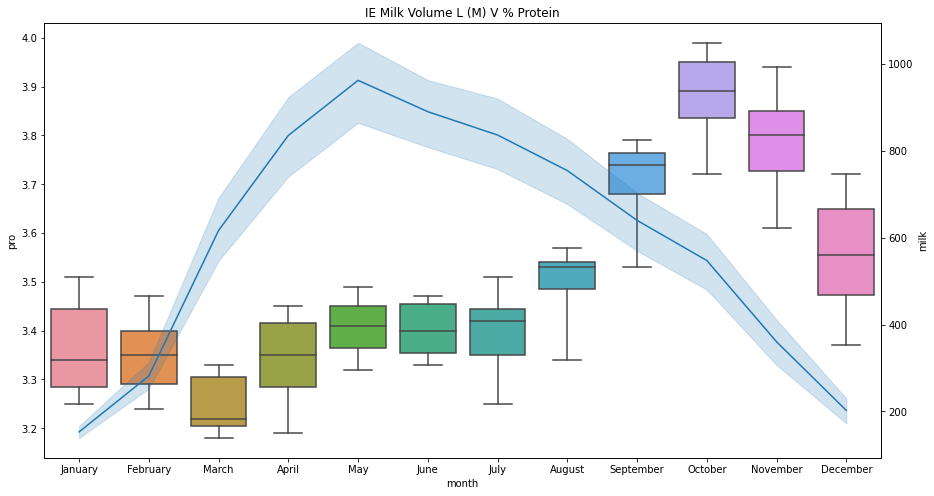

In [157]:
rcParams['figure.figsize'] = 15,8
ax = sns.boxplot(x='month',y = 'pro', data = iedf, whis = 10)
ax2 = ax.twinx()
ax =sns.lineplot(x='month', y ='milk',data = iedf).set(title='IE Milk Volume L (M) V % Protein')
plt.savefig("box_ie_pro_milk.png", dpi=300);

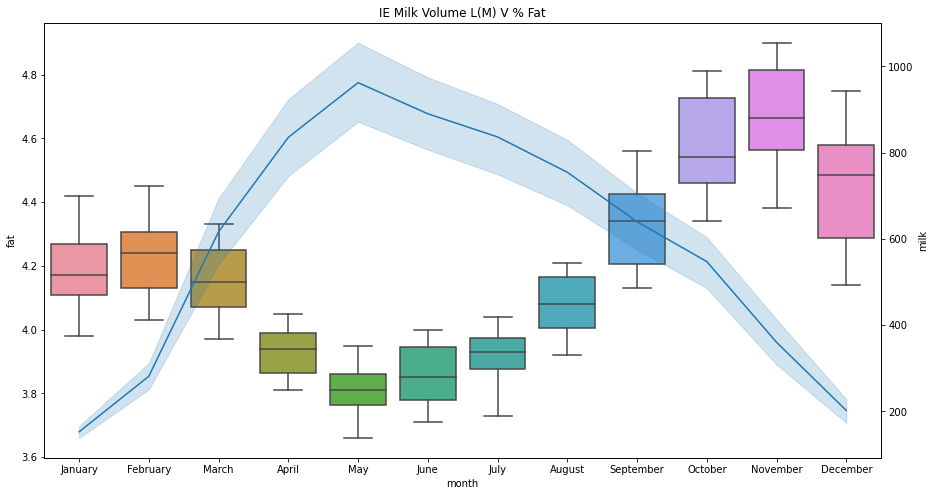

In [158]:
ax = sns.boxplot(x='month' , y = 'fat', data = iedf, whis = 10)
ax2 = ax.twinx()
sns.lineplot(x='month', y ='milk',data = iedf).set(title='IE Milk Volume L(M) V % Fat')
plt.savefig("box_ie_fat_milk.png", dpi=300);

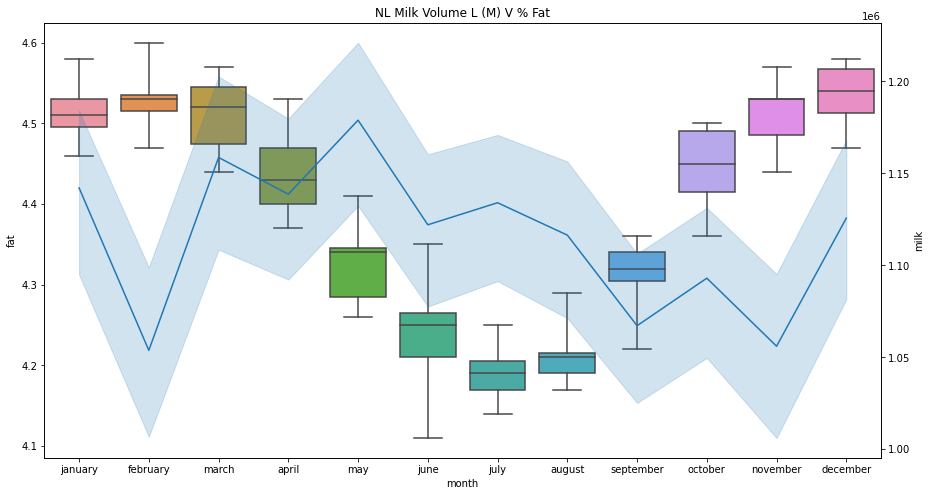

In [159]:

ax = sns.boxplot(x='month' , y = 'fat', data = nldf, whis = 10)

ax2 = ax.twinx()
ax = sns.lineplot(x='month', y ='milk',data = nldf).set(title='NL Milk Volume L (M) V % Fat')
plt.savefig("box_nl_fat_milk.png", dpi=300);

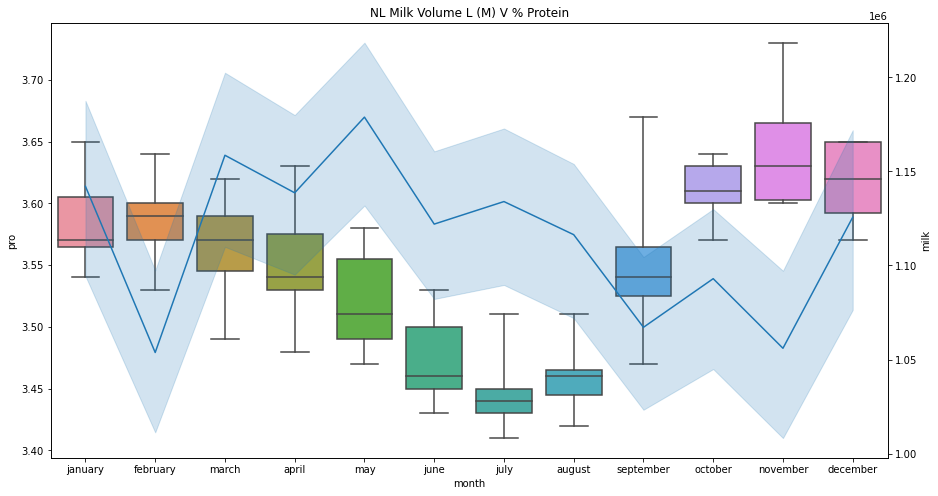

In [160]:
ax = sns.boxplot(x='month' , y = 'pro', data = nldf, whis = 10)

ax2 = ax.twinx()
ax = sns.lineplot(x='month', y ='milk',data = nldf).set(title='NL Milk Volume L (M) V % Protein')
plt.savefig("box_nl_pro_milk.png", dpi=300);

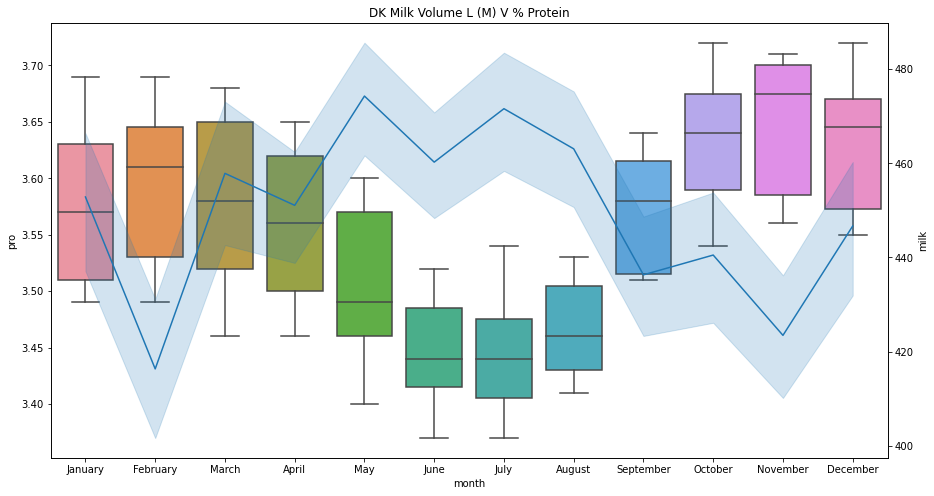

In [161]:
ax = sns.boxplot(x='month' , y = 'pro', data = dkdf, whis = 10)

ax2 = ax.twinx()
ax = sns.lineplot(x='month', y ='milk',data = dkdf).set(title='DK Milk Volume L (M) V % Protein')
plt.savefig("box_dk_pro_milk.png", dpi=300);

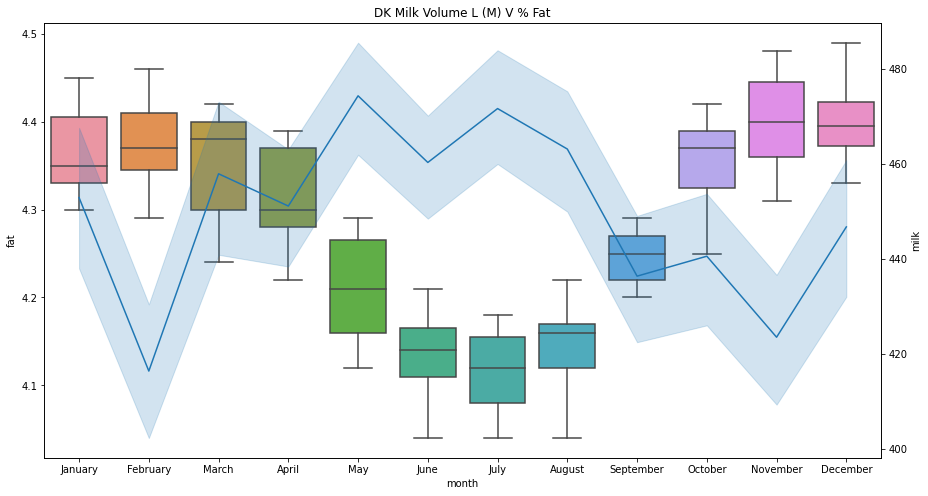

In [162]:
ax = sns.boxplot(x='month' , y = 'fat', data = dkdf, whis = 10)

ax2 = ax.twinx()
ax = sns.lineplot(x='month', y ='milk',data = dkdf).set(title='DK Milk Volume L (M) V % Fat')
plt.savefig("box_dk_fat_milk.png", dpi=300);

[Text(0.5, 0, '% Fat'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'IE % Fat distribution')]

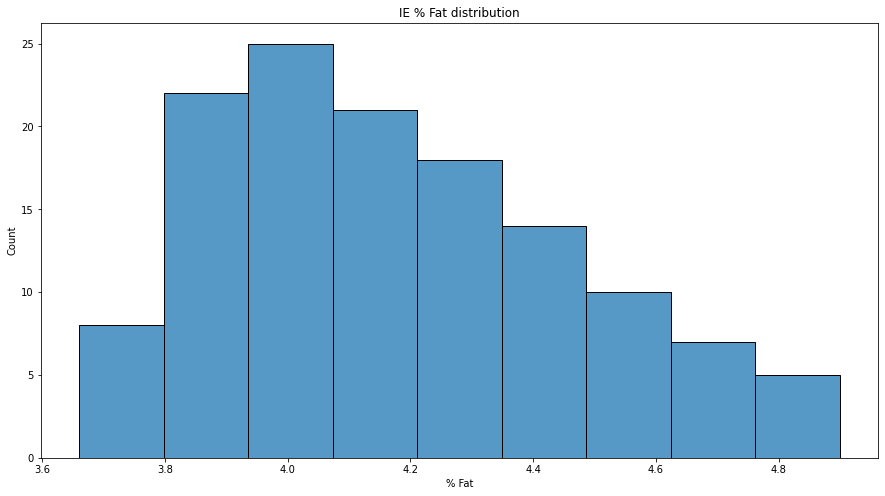

In [21]:
# Descriptive Statistics - summerise the dataset, help id chosen model
ax = sns.histplot(iedf.fat)
ax.set(xlabel='% Fat', ylabel='Count', title ='IE % Fat distribution');

[Text(0.5, 0, '% Fat'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'NL % Fat distribution')]

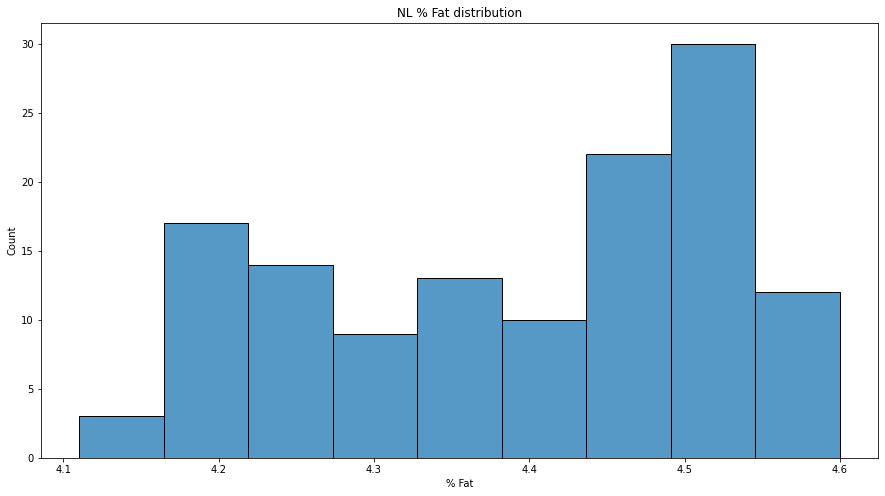

In [22]:
# Descriptive Statistics - summerise the dataset, help id chosen model
ax = sns.histplot(nldf.fat)
ax.set(xlabel='% Fat', ylabel='Count', title ='NL % Fat distribution');

[Text(0.5, 0, '% Protein'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '% Protein distribution')]

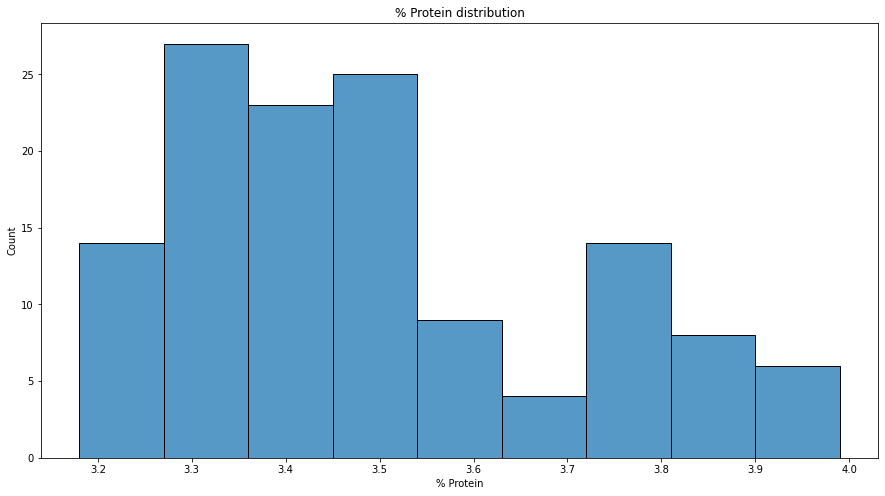

In [23]:
# Descriptive Statistics - summerise the dataset, help id chosen model
ax = sns.histplot(iedf.pro)
ax.set(xlabel='% Protein', ylabel='Count', title ='% Protein distribution');

[Text(0.5, 0, '% Protein'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '% Protein distribution')]

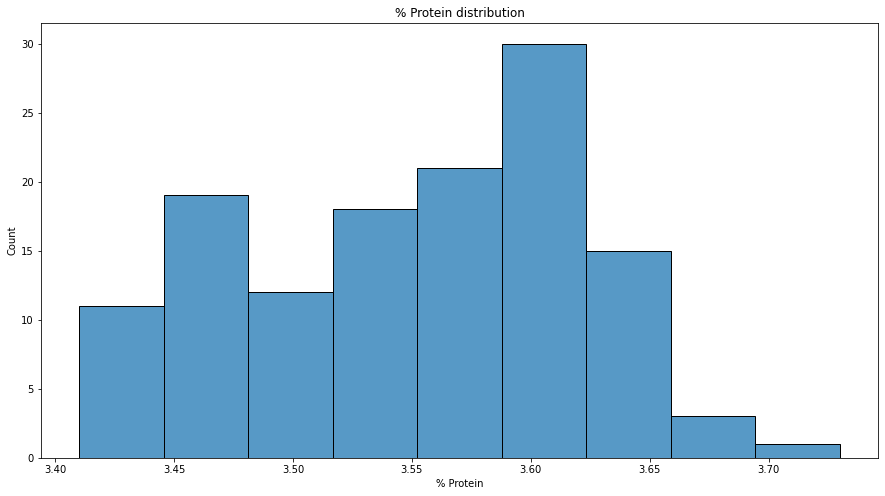

In [24]:
# Descriptive Statistics - summerise the dataset, help id chosen model
ax = sns.histplot(nldf.pro)
ax.set(xlabel='% Protein', ylabel='Count', title ='% Protein distribution');

In [ ]:
#hypothesis : Irelands grass based milk production results in higher percentage protine
# when compared to the Dutch production method which is more dry feeding based for 2021

#Null hypothesis : there is no significant difference between the Irish grass based 
# production method and the dutch based system . Any difference is due to chance.

# we a probability of 

In [115]:
# Select 2012 data for IE and NL
ie2021 =  iedf[(iedf['date'] >= '2021-01-01') & (iedf['date'] <= '2021-12-31')]
nl2021 =  nldf[(nldf['date'] >= '2021-01-01') & (nldf['date'] <= '2021-12-31')]
dk2021 =  dkdf[(dkdf['date'] >= '2021-01-01') & (dkdf['date'] <= '2021-12-31')]
ie2021['pro'].describe()
# The IE protine mean is 3.579167

count    12.000000
mean      3.579167
std       0.196166
min       3.330000
25%       3.447500
50%       3.500000
75%       3.722500
max       3.950000
Name: pro, dtype: float64

In [32]:
nl2021['pro'].describe()
# The NL protine mean is 3.588333

count    12.000000
mean      3.588333
std       0.061914
min       3.480000
25%       3.555000
50%       3.600000
75%       3.632500
max       3.670000
Name: pro, dtype: float64

#   t - test one sample


In [97]:
# Doing a t-test one sample.
# H0 = The mean protine in IE = to mean protine in NL ( u = 3.588333)
# H1 != The mean protine in IE = to mean protine in NL( u != 3.588333)
# From above
X = ie2021['pro']
stats.ttest_1samp(X,3.588333)
# P > 0.05 therefore We accept H0 , the means are the same in the two populations

Ttest_1sampResult(statistic=-0.16186865295153674, pvalue=0.8743442345288226)

# Wilcoxon test for one sample

In [ ]:
# H0 =  DK expected value is the same as the NL expected value 3.588333
# H1 = DK expected value is not the same as the NL expected value 3.588333


In [124]:
z_statistic, p_value = wilcoxon(v3 - 3.588333)
print (f"one-sample wilcoxon-test: {p_value}") 
# the p value returned greater the 0.05 therefore we accept the null hypothesis.

one-sample wilcoxon-test: 0.17626953125


# Independent sample Non Parametric test 

In [ ]:
# I am comparing the 2021 % protine between IE and NL
# First i need to check the varience between the two sampled to determine 
# which t - test to go with Parametric or Non - Parametric
# H0 = There is no significent difference between 
# H1 != The mean protine in IE = to mean protine in NL( u != 3.588333)

In [52]:
# inspecting the variance of both groups.

v1 = ie2021['pro']
v2 = nl2021['pro']
print(f" IE variance = {np.var(v1)},  NL variance = {np.var(v2)}")
# ratio is 0.032 / 0.0035 , the varience between the two groups is too big thefore
# cannot comapre with parametric. they should be a max 4 to 1 to go with parametric test
# but my varience  here is 10 to 1
#  Parametric tests are desirable as they give a better result.
# We will instead move forward with the non Parametric test 

 IE variance = 0.03527430555555556,  NL variance = 0.0035138888888888923


In [101]:
# The Non Parametric test.
# Because im using two independent samples I will use the Mann - Whitney U test 
# using the PyNonpar library
#!pip install PyNonpar
import PyNonpar
from PyNonpar.twosample import wilcoxon_mann_whitney_test

In [102]:
# For the test the data needs to be in a list format
# making two lists from the data set
v1_list = list(v1)
v2_list = list(v2)

In [105]:
# H0 = in the population the sum of rankings in the two groups does not differ
# H1 = in the population the sum of rankings in the two groups does differ
# Executing the test( it uses .05 for alpha and is a two sided test as default)
# because my p value came back 0.325 ( the significance ) is greater than 0.05 therefore the two
# datasets do not have a significant difference in the scores on the ordinal scale.
# the hypothesis is accepted.
PyNonpar.twosample.wilcoxon_mann_whitney_test(v1_list,v2_list, method = "exact")


WilcoxonMannWhitneyResult(alternative='two.sided', statistic=167.5, HodgesLehmann=0.06999999999999984, lowerCI=-0.10999999999999988, upperCI=0.1499999999999999, pvalue=0.3254353668945136)

In [106]:
# to get the coresponding z value we use the asymptotic method
PyNonpar.twosample.wilcoxon_mann_whitney_test(v1_list,v2_list, method = "asymptotic")
# the statistic of 1.01 is the z-value and gain the p value wi well above 0.05 rejection zone.

WilcoxonMannWhitneyResult(alternative='two.sided', statistic=1.0108025460302388, HodgesLehmann=0.06999999999999984, lowerCI=-0.10999999999999988, upperCI=0.1499999999999999, pvalue=0.3121109443096244)

# Independent sample Non Parametric test t - test

In [116]:

# H0 = There is no significent difference between thre DK and NL samples
# H1 != There is no significent difference between thre DK and NL samples
# First , make my Danish sample , I already have my NL sample from above.
v3 = dk2021['pro']

In [117]:
print(f" DK variance = {np.var(v3)},  NL variance = {np.var(v2)}")

 DK variance = 0.0067409722222222185,  NL variance = 0.0035138888888888923


In [119]:
test = stats.ttest_ind(v3, v2, 
                      equal_var=False)
display(test)
# the result is P > 0.05 therefore I can accept H0

Ttest_indResult(statistic=1.1735961083596886, pvalue=0.2543319865136098)

In [ ]:
# The ratio of variances between the two independent samples is acceptablle 
# .0067/.0035. is within the 4/1 limit so I can continue with a parametric test this time.
# Looking at the graphs for protine, the Dutch and Danish graphs look more similar than 
# either of them do with the irish graph. Im putting this down to these two duristictions
# having a similar milk production system compared to irelands.

# More than two independent samples AVOVA or Kruskal - wallis Test

In [ ]:
# Pre check on . Are the samples independent. Yes , they srte from different regions.

<Figure size 1080x576 with 0 Axes>

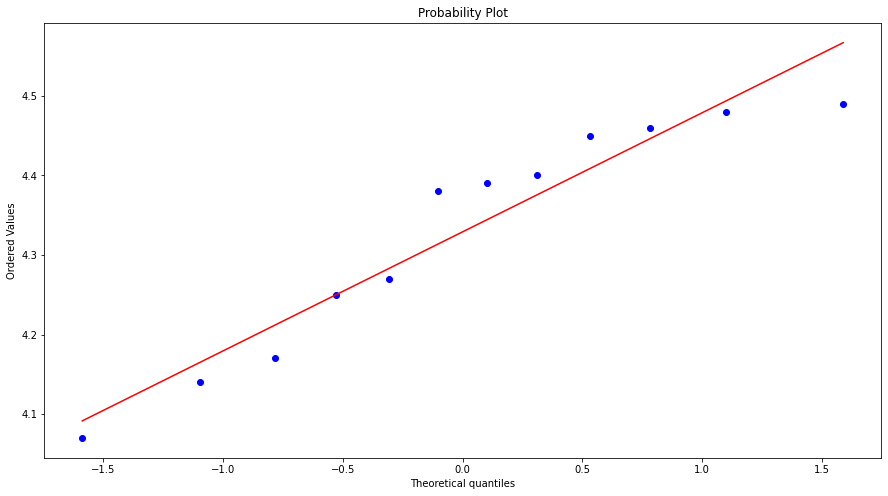

<Figure size 1080x576 with 0 Axes>

In [131]:
# H0: μ1 = μ2 = μ3 
# H1: We cannot say μ1 = μ2 = μ3
# Pre Check 2; are the samples Normality distributed.
# Normality plot for our variable  "fat"
# if our plot is close to the red line we can say its normal
stats.probplot(dk2021.fat, plot=plt)
plt.figure()

In [132]:

#Shapiro wilk test , checks if our dataset is from a normal distribution ie greater then 0.05 (1-.95)
stats.shapiro(dk2021.fat)
# The result came back with p > 0.05 therefore the data is normally distributes.
# Pre check 2 Yes for DL

ShapiroResult(statistic=0.9017327427864075, pvalue=0.1669994741678238)

<Figure size 1080x576 with 0 Axes>

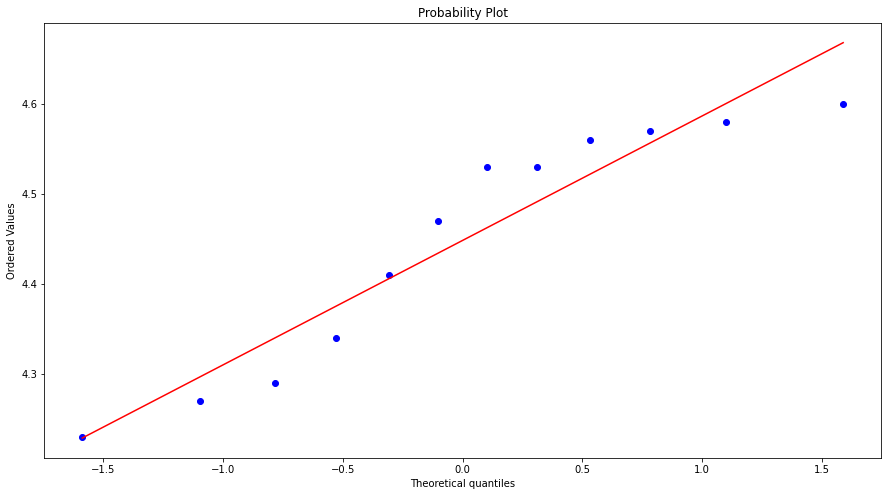

<Figure size 1080x576 with 0 Axes>

In [133]:
stats.probplot(nl2021.fat, plot=plt)
plt.figure()

In [135]:
#Shapiro wilk test , checks if our dataset is from a normal distribution ie greater then 0.05 (1-.95)
stats.shapiro(nl2021.fat)
# The result came back with p > 0.05 therefore the data is normally distributes.
# Pre check 2 Yes for NL

ShapiroResult(statistic=0.8822424411773682, pvalue=0.09364530444145203)

<Figure size 1080x576 with 0 Axes>

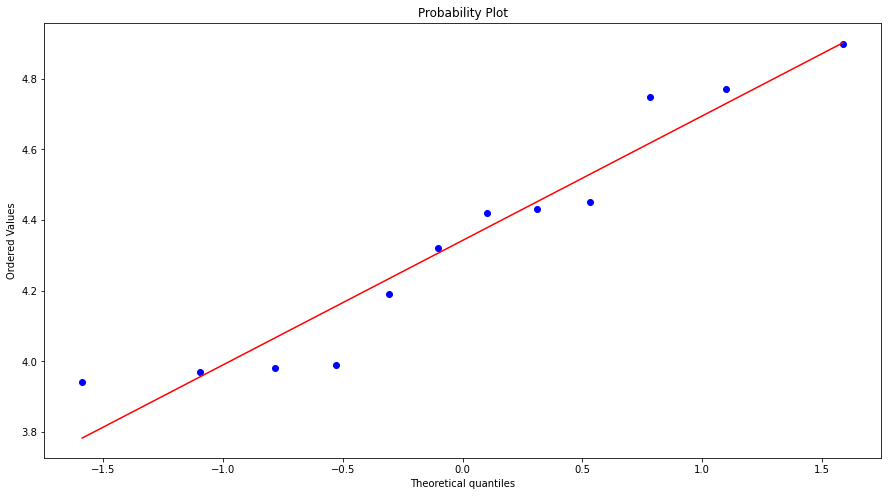

<Figure size 1080x576 with 0 Axes>

In [136]:
stats.probplot(ie2021.fat, plot=plt)
plt.figure()

In [137]:
#Shapiro wilk test , checks if our dataset is from a normal distribution ie greater then 0.05 (1-.95)
stats.shapiro(ie2021.fat)
# The result came back with p > 0.05 therefore the data is normally distributes.
# Pre check 2 Yes for IE

ShapiroResult(statistic=0.9058653116226196, pvalue=0.18878649175167084)

In [ ]:
# Pre test 3 Equality of variences.
# Will use an F-Test
# H0 : The variences are the same
# H1 : The variences are not the same

In [143]:
sd1 = ie2021['fat'].std()
sd2 = dk2021['fat'].std()
sd3 = nl2021['fat'].std()
print(sd1,sd2,sd3)

0.33911985009325635 0.14450280483803984 0.13455876265060035


In [145]:
#Homogeinity of variance: Levene's test
from scipy.stats import levene
levene(ie2021['fat'], dk2021['fat'], nl2021['fat'], center = 'mean')
# below 0.05 so we can not accept that variances are equal
# we have failed one of our pre checks and can not continue with the ANOVA test.

LeveneResult(statistic=7.742222195294826, pvalue=0.0017500079670352304)

In [146]:
# Had the above test passed I would have continued with the AONVA test
#ONE-WAY ANOVA
from scipy.stats import f_oneway
f_oneway(ie2021['fat'], dk2021['fat'], nl2021['fat'])
###the result here is meaningless because we did not pass all the pre tests. ####

F_onewayResult(statistic=0.996659549555754, pvalue=0.3799489481810015)

# Kruskal Wallis Non parametric test

In [148]:
# Insread I will perform the Kruskal Wallis Non parametric test 
# https://www.geeksforgeeks.org/how-to-perform-a-kruskal-wallis-test-in-python/
result = stats.kruskal(ie2021['fat'], dk2021['fat'], nl2021['fat'])
print(result)
# As the p value is not less then 0.05 We can accept the hypothesis 
# H0: μ1 = μ2 = μ3 

KruskalResult(statistic=3.265900605124244, pvalue=0.19535237447784481)


In [150]:
#from scipy.stats import ttest_ind
#res = ttest_ind(v1, v2,equal_var=True)

#print(res)

In [151]:
#res = ttest_ind(v1, v2,equal_var=False)

#print(res)

In [152]:
# Inferential statistics to gain insights on posibble population values
#X = iedf['pro']; X

In [153]:
#H0 : u = 3.44
#H1 : u =! 3.44
#stats.ttest_1samp(X,mu of H0)
#stats.ttest_1samp(X,3.59)


In [149]:
#inferential stats.  find similarities with parametric and non paremetric t-test, analysis of variance, wilcoxon , chi
# hypot and conclusion must be clearly stated.   
# use 5 diferent inferential stats

# check if the data is normal
#We plot the qq plot to verify if data is normal
#stats.probplot(iedf.pro , plot=plt)
#plt.figure()
#stats.probplot(nldf.pro , plot = plt)
#plt.figure()

In [ ]:
# review outcome to deepen understanding , indicate challanges